# Importing data and libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Importing data sets, where i imported test data two times for two variables, one for prediction and another for final csv creation.

In [22]:
path = "/gdrive/My Drive/Data/MLComp/"
data = pd.read_csv(path+"final.csv",index_col=False)
data_test=pd.read_csv(path+"Test.csv",index_col=False)
Z=pd.read_csv(path+"Test.csv",index_col=False)
data.head(10)

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
1,57,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,9,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
3,147,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
4,303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
5,65,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
6,179,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
7,243,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
8,126,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
9,94,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1


# Knowing the train data

In [23]:
Z.head(10)

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,128,67,0,2,152,277,0,1,172,0,0.0,2,1,2
1,232,57,1,0,165,289,1,0,124,0,1.0,1,3,3
2,220,48,1,0,130,256,1,0,150,1,0.0,2,2,3
3,184,58,1,2,112,230,0,0,165,0,2.5,1,1,3
4,25,40,1,3,140,199,0,1,178,1,1.4,2,0,3
5,56,52,1,1,134,201,0,1,158,0,0.8,2,1,2
6,28,51,1,2,110,175,0,1,123,0,0.6,2,0,2
7,125,39,0,2,94,199,0,1,179,0,0.0,2,0,2
8,139,57,1,0,110,201,0,1,126,1,1.5,1,0,1
9,67,51,1,2,100,222,0,1,143,1,1.2,1,0,2


In [24]:
data.shape

(253, 15)

In [25]:
data.describe()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,153.339921,53.976285,0.683794,0.980237,131.822134,245.051383,0.138340,0.509881,150.260870,0.332016,1.037945,1.399209,0.691700,2.312253,0.541502
std,88.442134,9.156890,0.465916,1.032990,17.288518,52.583053,0.345941,0.524122,22.538924,0.471870,1.163799,0.612955,1.011742,0.618280,0.499262
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.000000,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,152.000000,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,0.000000,154.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,230.000000,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,303.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
data.isnull().sum(axis=0)

ID          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
data.columns

Index(['ID', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [28]:
data.dtypes

ID            int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        253 non-null    int64  
 1   age       253 non-null    int64  
 2   sex       253 non-null    int64  
 3   cp        253 non-null    int64  
 4   trestbps  253 non-null    int64  
 5   chol      253 non-null    int64  
 6   fbs       253 non-null    int64  
 7   restecg   253 non-null    int64  
 8   thalach   253 non-null    int64  
 9   exang     253 non-null    int64  
 10  oldpeak   253 non-null    float64
 11  slope     253 non-null    int64  
 12  ca        253 non-null    int64  
 13  thal      253 non-null    int64  
 14  target    253 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 29.8 KB


In [30]:
data_test.max()

ID          292.0
age          71.0
sex           1.0
cp            3.0
trestbps    178.0
chol        407.0
fbs           1.0
restecg       2.0
thalach     182.0
exang         1.0
oldpeak       4.4
slope         2.0
ca            3.0
thal          3.0
dtype: float64

In [31]:
data_test.min()

ID           12.0
age          39.0
sex           0.0
cp            0.0
trestbps     94.0
chol        157.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          1.0
dtype: float64

Getting minimum and maximum values for each linear features for grouping.

# age

In [32]:
data.age.max()

77

In [33]:
data.age.min()

29

In [34]:
data.age.median()

55.0

# trestbps

In [35]:
data.trestbps.max()

200

In [36]:
data.trestbps.min()

94

In [37]:
data.trestbps.median()

130.0

# chol

In [38]:
data.chol.max()

564

In [39]:
data.chol.min()

126

# thalach

In [40]:
data.thalach.max()

202

In [41]:
data.thalach.min()

90

# Oldpeak

In [42]:
data.oldpeak=data.oldpeak*10

In [43]:
data.oldpeak.min()

0.0

In [44]:
data.oldpeak.max()

62.0

# ID

In [45]:
data.ID.min()

1

In [46]:
data.ID.max()

303

# Creating a function to do grouping of possible data

Grouping every linear data for better classification model

In [47]:
def grouping(data):
  #age
  data['age'] = data['age'].astype(int)
  data.loc[data['age'] <= 29, 'age'] = 0
  data.loc[(data['age'] > 29) & (data['age'] <= 40), 'age'] = 1
  data.loc[(data['age'] > 40) & (data['age'] <= 50), 'age'] = 2
  data.loc[(data['age'] > 50) & (data['age'] <= 60), 'age'] = 3
  data.loc[(data['age'] > 60) & (data['age'] <= 70), 'age'] = 4
  data.loc[(data['age'] > 70) & (data['age'] <= 77), 'age'] = 5
  data.loc[data['age'] > 77, 'age'] = 6
  #trestbps
  data['trestbps'] = data['trestbps'].astype(int)
  data.loc[data['trestbps'] <= 94, 'trestbps'] = 0
  data.loc[(data['trestbps'] > 94) & (data['trestbps'] <= 120), 'trestbps'] = 1
  data.loc[(data['trestbps'] > 120) & (data['trestbps'] <=140), 'trestbps'] = 2
  data.loc[(data['trestbps'] > 140) & (data['trestbps'] <= 160),'trestbps'] = 3
  data.loc[(data['trestbps'] > 160) & (data['trestbps'] <= 180),'trestbps'] = 4
  data.loc[(data['trestbps'] > 180) & (data['trestbps'] <= 200), 'trestbps'] = 5
  data.loc[data['trestbps'] > 200, 'trestbps'] = 6
  #chol
  data['chol'] = data['chol'].astype(int)
  data.loc[data['chol'] <= 126, 'chol'] = 0
  data.loc[(data['chol'] > 126) & (data['chol'] <= 200), 'chol'] = 1
  data.loc[(data['chol'] > 200) & (data['chol'] <=300), 'chol'] = 2
  data.loc[(data['chol'] > 300) & (data['chol'] <= 400),'chol'] = 3
  data.loc[(data['chol'] > 400) & (data['chol'] <= 500),'chol'] = 4
  data.loc[(data['chol'] > 500) & (data['chol'] <= 564), 'chol'] = 5
  data.loc[data['chol'] > 564, 'chol'] = 6
  #thalach
  data['thalach'] = data['thalach'].astype(int)
  data.loc[data['thalach'] <= 90, 'thalach'] = 0
  data.loc[(data['thalach'] > 90) & (data['thalach'] <= 120), 'thalach'] = 1
  data.loc[(data['thalach'] > 120) & (data['thalach'] <=140), 'thalach'] = 2
  data.loc[(data['thalach'] > 140) & (data['thalach'] <= 160),'thalach'] = 3
  data.loc[(data['thalach'] > 160) & (data['thalach'] <= 180),'thalach'] = 4
  data.loc[(data['thalach'] > 180) & (data['thalach'] <= 202), 'thalach'] = 5
  data.loc[data['thalach'] > 202, 'thalach'] = 6
  #oldpeak
  data.oldpeak=data.oldpeak*10
  data['oldpeak'] = data['oldpeak'].astype(int)
  data.loc[data['oldpeak'] <= 0, 'oldpeak'] = 0
  data.loc[(data['oldpeak'] > 0) & (data['oldpeak'] <= 10),'oldpeak'] = 1
  data.loc[(data['oldpeak'] > 10) & (data['oldpeak'] <= 20),'oldpeak'] = 2
  data.loc[(data['oldpeak'] > 20) & (data['oldpeak'] <= 30),'oldpeak'] = 3
  data.loc[(data['oldpeak'] > 30) & (data['oldpeak'] <= 40),'oldpeak'] = 4
  data.loc[(data['oldpeak'] > 40) & (data['oldpeak'] <= 50),'oldpeak'] = 5
  data.loc[(data['oldpeak'] > 50) & (data['oldpeak'] <= 60),'oldpeak'] = 6
  data.loc[data['oldpeak'] > 60, 'oldpeak'] = 6
  #ID
  data['ID'] = data['ID'].astype(int)
  data.loc[data['ID'] <= 1, 'ID'] = 0
  data.loc[(data['ID'] > 1) & (data['ID'] <= 70), 'ID'] = 1
  data.loc[(data['ID'] > 70) & (data['ID'] <= 140), 'ID'] = 2
  data.loc[(data['ID'] > 140) & (data['ID'] <= 210), 'ID'] = 3
  data.loc[(data['ID'] > 210) & (data['ID'] <= 280), 'ID'] = 4
  data.loc[(data['ID'] > 280) & (data['ID'] <= 303), 'ID'] = 5
  data.loc[data['ID'] > 303, 'ID'] = 6
  return

Applying the function to the datasets

In [48]:
grouping(data)
data.head(10)

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,4,0,2,2,4,1,0,3,0,6,2,1,2,1
1,1,2,1,0,2,2,0,0,5,0,0,2,0,2,1
2,1,3,1,2,4,1,1,1,4,0,5,2,0,3,1
3,3,2,0,2,1,2,0,1,3,0,3,1,1,2,1
4,5,3,0,1,2,2,0,0,4,0,0,1,1,2,0
5,1,3,1,2,2,2,1,0,4,0,0,2,0,2,1
6,3,2,1,0,1,1,0,0,1,1,6,1,0,3,0
7,4,4,1,0,3,2,0,0,2,0,6,1,2,1,0
8,2,1,0,1,1,2,0,1,5,0,6,2,0,2,1
9,2,3,0,1,2,2,1,0,3,1,0,2,1,2,1


In [49]:
grouping(Z)
Z.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,2,4,0,2,3,2,0,1,4,0,0,2,1,2
1,4,3,1,0,4,2,1,0,2,0,1,1,3,3
2,4,2,1,0,2,2,1,0,3,1,0,2,2,3
3,3,3,1,2,1,2,0,0,4,0,3,1,1,3
4,1,1,1,3,2,1,0,1,4,1,2,2,0,3


knowing the no. of samples on each features according to the responce variable target

In [50]:
data.groupby(['sex', 'target'])['target'].count()

sex  target
0    0         18
     1         62
1    0         98
     1         75
Name: target, dtype: int64

In [51]:
data.groupby(['target', 'age'])['age'].count()

target  age
0       1       6
        2      20
        3      55
        4      34
        5       1
1       0       1
        1      10
        2      46
        3      55
        4      21
        5       4
Name: age, dtype: int64

In [52]:
data.groupby(['target', 'chol'])['chol'].count()

target  chol
0       1       20
        2       80
        3       15
        4        1
1       0        1
        1       23
        2       93
        3       18
        4        1
        5        1
Name: chol, dtype: int64

In [53]:
pd.crosstab([data.sex,data.target],data.age,margins=True).style.background_gradient(cmap='jet')

In [54]:
pd.crosstab([data.sex,data.target],data.chol,margins=True).style.background_gradient(cmap='jet')

# Test train split

In [55]:
y=data['target']
x=data.drop('target',axis=1)
x

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,4,0,2,2,4,1,0,3,0,6,2,1,2
1,1,2,1,0,2,2,0,0,5,0,0,2,0,2
2,1,3,1,2,4,1,1,1,4,0,5,2,0,3
3,3,2,0,2,1,2,0,1,3,0,3,1,1,2
4,5,3,0,1,2,2,0,0,4,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,4,1,1,0,1,1,0,1,2,1,6,1,0,3
249,2,2,1,2,2,2,1,1,4,0,0,2,2,2
250,2,4,1,1,2,2,1,0,2,0,0,2,0,2
251,3,3,1,0,2,2,0,0,3,1,6,1,1,3


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((177, 14), (76, 14), (177,), (76,))

#logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  StratifiedKFold

In [58]:
fold = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
fold.get_n_splits(x_train,y_train)

5

In [59]:
parameters={"solver":("newton-cg","liblinear"),"C":[1,10,15,20]}
model=LogisticRegression(penalty="l2",n_jobs=-2,max_iter=1000)
log_reg=GridSearchCV(model,parameters,n_jobs=-2,cv=fold)
log_reg.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=-2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'C': [1, 10, 15, 20],
                         'solver': ('newton-cg', 'liblinear')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
print(log_reg.best_params_)

{'C': 1, 'solver': 'newton-cg'}


In [61]:
yt_pred__log_reg=log_reg.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,yt_pred__log_reg))
ac=accuracy_score(y_test,yt_pred__log_reg)
print("test accuracy = {} %",format(ac*100))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.97      0.93      0.95        42

    accuracy                           0.95        76
   macro avg       0.95      0.95      0.95        76
weighted avg       0.95      0.95      0.95        76

test accuracy = {} % 94.73684210526315


In [62]:
logreg_probs = log_reg.predict_proba(x_test)
logreg_probs = logreg_probs[:, 1]
from sklearn.metrics import roc_auc_score
logreg_auc = roc_auc_score(y_test, logreg_probs)
print('Logistic: ROC AUC= {} %'.format(round(logreg_auc, 3)*100))

Logistic: ROC AUC= 99.2 %


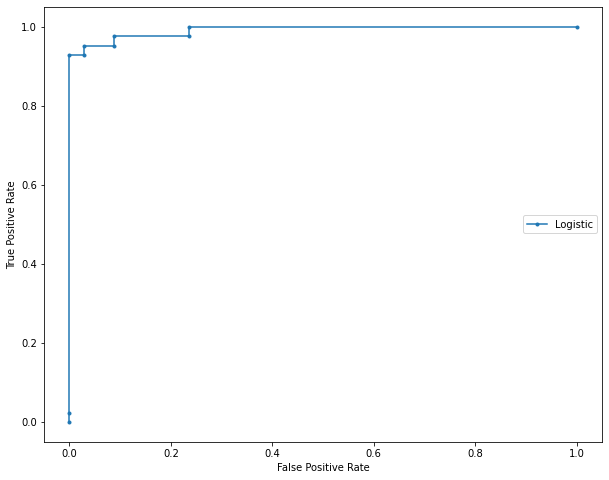

In [63]:
from sklearn.metrics import roc_curve
logreg_fpr, logreg_tpr, lr_thres = roc_curve(y_test, logreg_probs)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=5)
plt.show()

#KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score,make_scorer
f_scorer = make_scorer(fbeta_score,beta=1,pos_label=1)
params={"n_neighbors":[1,2,100,10,5,6]}
KNN=KNeighborsClassifier(algorithm="brute")
Knn_grid= GridSearchCV(KNN,params,n_jobs=-2,cv=fold,scoring=f_scorer,verbose=True)
Knn_grid.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='brute', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-2,
             param_grid={'n_neighbors': [1, 2, 100, 10, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=1, pos_label=1),
             verbose=True)

In [65]:
print(Knn_grid.best_params_)

{'n_neighbors': 5}


In [66]:
yt_pred__Knn=Knn_grid.predict(x_test)
print(classification_report(y_test,yt_pred__Knn))
ac_knn=accuracy_score(y_test,yt_pred__Knn)
print("test accuracy = {} %",format(ac_knn*100))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.93      0.88      0.90        42

    accuracy                           0.89        76
   macro avg       0.89      0.90      0.89        76
weighted avg       0.90      0.89      0.89        76

test accuracy = {} % 89.47368421052632


In [67]:
Knn_grid_probs = Knn_grid.predict_proba(x_test)
Knn_grid_probs = Knn_grid_probs[:, 1]
Knn_grid_auc = roc_auc_score(y_test, Knn_grid_probs)
print('KNN: ROC AUC= {} %'.format(round(Knn_grid_auc, 3)*100))

KNN: ROC AUC= 97.2 %


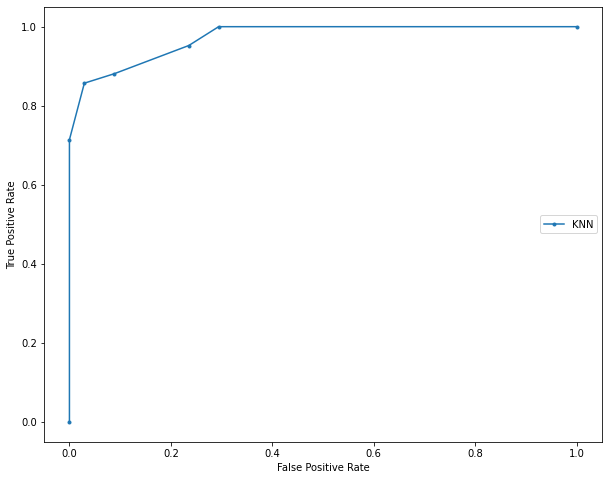

In [68]:
fig, ax = plt.subplots(figsize=(10, 8))
Knn_fpr, Knn_tpr, Knn_thres = roc_curve(y_test, Knn_grid_probs)
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=5)
plt.show()

#decision tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="gini")
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
y_pred_dtree= dtree.predict(x_test)
print(classification_report(y_test, y_pred_dtree))
ac_dtree=accuracy_score(y_test,y_pred_dtree)
print("test accuracy = {} %",format(ac_dtree*100))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.95      0.98      0.96        42

    accuracy                           0.96        76
   macro avg       0.96      0.96      0.96        76
weighted avg       0.96      0.96      0.96        76

test accuracy = {} % 96.05263157894737


In [71]:
prune_path = dtree.cost_complexity_pruning_path(x_train, y_train)
alphas = prune_path.ccp_alphas
impurities = prune_path.impurities

new_dTrees = []
i=0

for alpha in alphas:
    new_dTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alpha)
    new_dTree.fit(x_train, y_train)
    
    new_dTrees.append(new_dTree)

In [72]:
test_scores = [new_dTree.score(x_test, y_test) for new_dTree in new_dTrees]
print('max f1 test_score = {}'.format(max(test_scores)))
print('position of max f1 = {}'.format(np.argmax(test_scores)))

pruned_dTree = DecisionTreeClassifier(criterion='gini', ccp_alpha=alphas[np.argmax(test_scores)])
pruned_dTree.fit(x_train, y_train)
ytpred_dTree = pruned_dTree.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, ytpred_dTree))
ac_pdtree=accuracy_score(y_test,ytpred_dTree)
print("test accuracy = {} %",format(ac_pdtree*100))

max f1 test_score = 0.9736842105263158
position of max f1 = 2
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.93      0.95      0.94        42

    accuracy                           0.93        76
   macro avg       0.93      0.93      0.93        76
weighted avg       0.93      0.93      0.93        76

test accuracy = {} % 93.42105263157895


In [73]:
Dtree_probs = pruned_dTree.predict_proba(x_test)
Dtree_probs = Dtree_probs[:, 1]
Dtree_auc = roc_auc_score(y_test, Dtree_probs)
print('DTree: ROC AUC= {} %'.format(round(Dtree_auc, 3)*100))

DTree: ROC AUC= 94.39999999999999 %


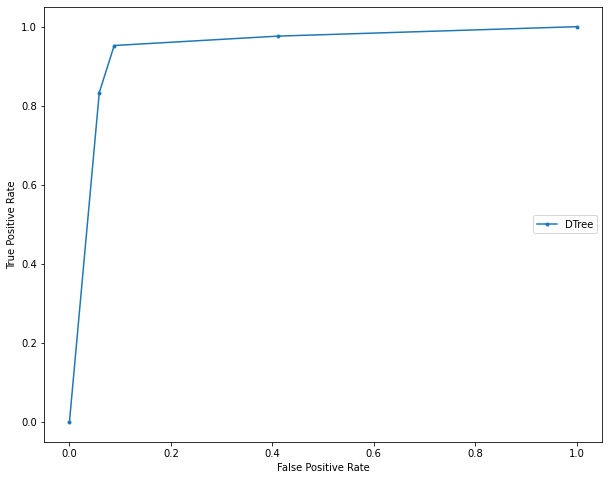

In [74]:
fig, ax = plt.subplots(figsize=(10, 8))
Dtree_fpr, Dtree_tpr, Dtree_thres = roc_curve(y_test, Dtree_probs)
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=5)
plt.show()

#Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
y_pred_RF= rf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF))
ac_rf=accuracy_score(y_test,y_pred_RF)
print("test accuracy = {} %",format(ac_rf*100))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.98      0.98      0.98        42

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76

test accuracy = {} % 97.36842105263158


In [77]:
print('Random forest Training Accuracy:',rf.score(x_train, y_train))
print('Random forest Test Accuracy:', rf.score(x_test, y_test))
print("************************************************************************")
print(classification_report(y_test,y_pred_RF))
print("************************************************************************")
print(y_pred_RF)

Random forest Training Accuracy: 1.0
Random forest Test Accuracy: 0.9736842105263158
************************************************************************
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.98      0.98      0.98        42

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76

************************************************************************
[1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1
 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1
 1 1]


In [78]:
rf_probs = rf.predict_proba(x_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest: ROC AUC= {} %'.format(round(rf_auc, 3)*100))

Random Forest: ROC AUC= 99.2 %


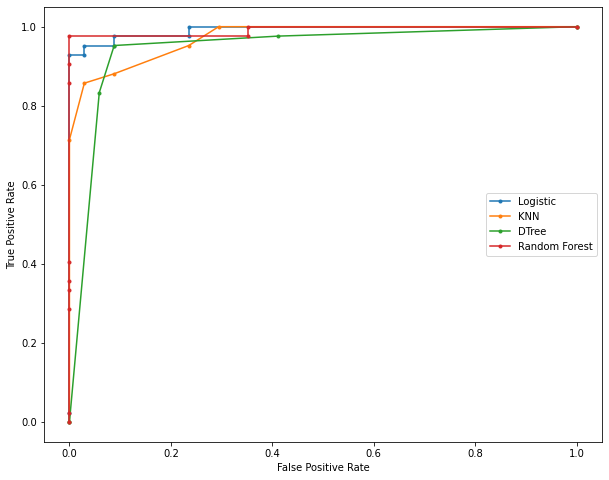

In [79]:
rf_fpr, rf_tpr, rf_thres = roc_curve(y_test, rf_probs)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic')
ax.plot(Knn_fpr, Knn_tpr, marker='.', label='KNN')
ax.plot(Dtree_fpr, Dtree_tpr, marker='.', label='DTree')
ax.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=5)
plt.show()

# Ensembles

# Random forest and logistic regression

In [80]:
from sklearn.preprocessing import OneHotEncoder
X_train, X_train_lr, Y_train, Y_train_lr = train_test_split(x_train, y_train, test_size=0.25,random_state=2,shuffle = True)
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)
rf_enc = OneHotEncoder()
rf_enc.fit(rf.apply(x_train))
rf_enc

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [81]:
f = rf_enc.transform(rf.apply(X_train_lr))
f.shape

(45, 20624)

In [82]:
fold = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
fold.get_n_splits(X_train_lr, Y_train_lr)

parameters = {'solver':('liblinear', 'sag'), 'C':[0.001]}

model_rflr = LogisticRegression(penalty='l2', n_jobs = -2, max_iter=1000)
rf_lr = GridSearchCV(model_rflr, parameters, n_jobs= -2, cv=fold)


rf_lr.fit(rf_enc.transform(rf.apply(X_train_lr)), Y_train_lr)

print(rf_lr.best_params_)

{'C': 0.001, 'solver': 'liblinear'}


In [83]:
ypred_rf_lr=rf_lr.predict(rf_enc.transform(rf.apply(x_test)))

In [84]:
from sklearn.metrics import f1_score
print(f1_score(ypred_rf_lr,y_test))
ac_rf_lr=accuracy_score(ypred_rf_lr,y_test)
print("test accuracy = {} %",format(ac_rf*100))

0.9761904761904762
test accuracy = {} % 97.36842105263158


Logistic and Random Forest: ROC AUC= 99.1 %


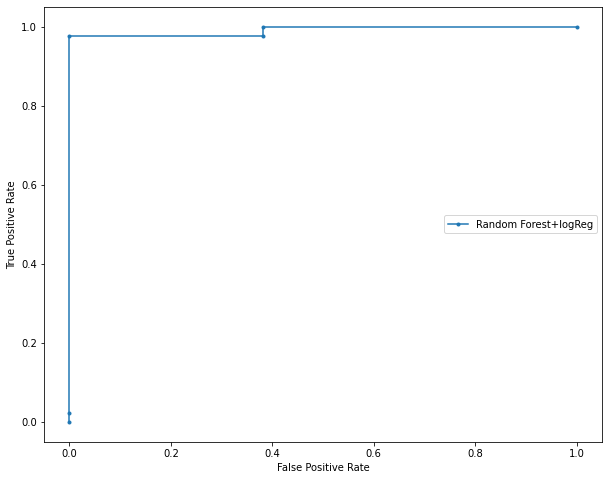

In [85]:
yprobs_rf_lr = rf_lr.predict_proba(rf_enc.transform(rf.apply(x_test)))
yprobs_rf_lr= yprobs_rf_lr[:, 1]
rf_lr_auc = roc_auc_score(y_test, yprobs_rf_lr)
print('Logistic and Random Forest: ROC AUC= {} %'.format(round(rf_lr_auc, 3)*100))
fpr_rf_lr, tpr_rf_lr, thres_rf_lr = roc_curve(y_test, yprobs_rf_lr)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(fpr_rf_lr, tpr_rf_lr, marker='.', label='Random Forest+logReg')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=5)
plt.show()

#Random forest with knn

In [86]:
f_scorer = make_scorer(fbeta_score,beta=1,pos_label=1)
params={"n_neighbors":[1,10,20,36]}
model_rfKNN=KNeighborsClassifier(algorithm="brute")
rf_KNN= GridSearchCV(model_rfKNN,params,n_jobs=-2,cv=fold,scoring=f_scorer,verbose=True)
rf_KNN.fit(rf_enc.transform(rf.apply(X_train_lr)), Y_train_lr)
print(rf_KNN.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'n_neighbors': 1}


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 out of  20 | elapsed:    0.1s finished


In [87]:
ypred_rf_KNN=rf_KNN.predict(rf_enc.transform(rf.apply(x_test)))

In [88]:
from sklearn.metrics import f1_score
print(f1_score(ypred_rf_KNN,y_test))
ac_rf_KNN=accuracy_score(ypred_rf_KNN,y_test)
print("test accuracy = {} %",format(ac_rf*100))

0.9761904761904762
test accuracy = {} % 97.36842105263158


KNN and Random Forest: ROC AUC= 97.3 %


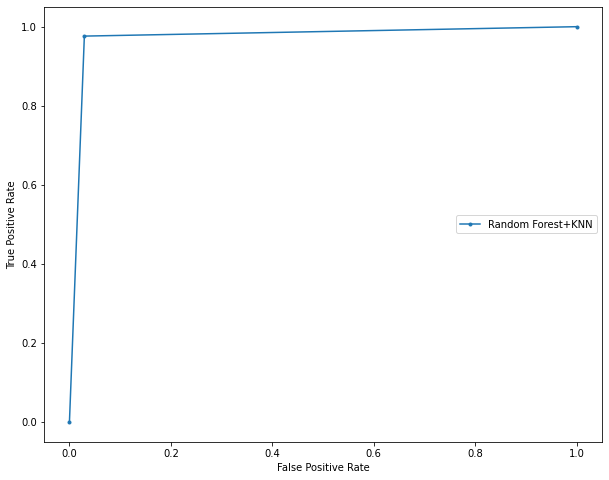

In [89]:
yprobs_rf_KNN = rf_KNN.predict_proba(rf_enc.transform(rf.apply(x_test)))
yprobs_rf_KNN= yprobs_rf_KNN[:, 1]
rf_KNN_auc = roc_auc_score(y_test, yprobs_rf_KNN)
print('KNN and Random Forest: ROC AUC= {} %'.format(round(rf_KNN_auc, 3)*100))
fpr_rf_KNN, tpr_rf_KNN, thres_rf_KNN = roc_curve(y_test, yprobs_rf_KNN)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(fpr_rf_KNN, tpr_rf_KNN, marker='.', label='Random Forest+KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=5)
plt.show()

#Random forest with decision tree

In [90]:
model_rfdtree= DecisionTreeClassifier(criterion="gini")
params={}
rf_dtree= GridSearchCV(model_rfdtree,params,n_jobs=-2,cv=fold,verbose=True)
rf_dtree.fit(rf_enc.transform(rf.apply(X_train_lr)), Y_train_lr)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-2, param_grid=

In [91]:
ypred_rf_dtree=rf_dtree.predict(rf_enc.transform(rf.apply(x_test)))
ypred_rf_dtree_test=rf_dtree.predict(rf_enc.transform(rf.apply(data_test)))

In [92]:
from sklearn.metrics import f1_score
print(f1_score(ypred_rf_dtree,y_test))
ac_rf_dtree=accuracy_score(ypred_rf_dtree,y_test)
print("test accuracy = {} %",format(ac_rf*100))

0.8723404255319148
test accuracy = {} % 97.36842105263158


dtree and Random Forest: ROC AUC= 82.6 %


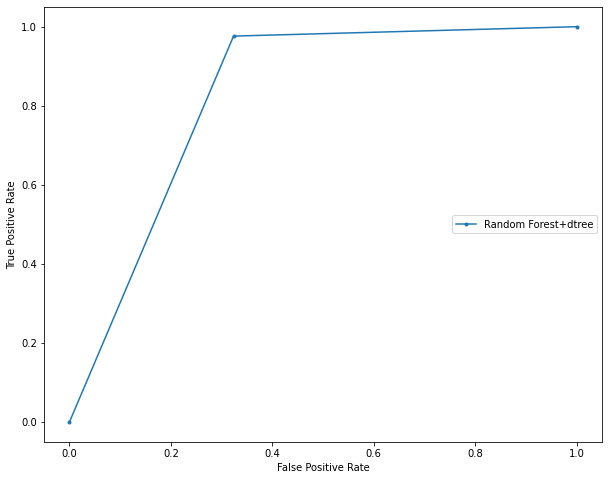

In [93]:
yprobs_rf_dtree = rf_dtree.predict_proba(rf_enc.transform(rf.apply(x_test)))
yprobs_rf_dtree= yprobs_rf_dtree[:, 1]
rf_dtree_auc = roc_auc_score(y_test, yprobs_rf_dtree)
print('dtree and Random Forest: ROC AUC= {} %'.format(round(rf_dtree_auc, 3)*100))
fpr_rf_dtree, tpr_rf_dtree, thres_rf_dtree = roc_curve(y_test, yprobs_rf_dtree)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(fpr_rf_dtree, tpr_rf_dtree, marker='.', label='Random Forest+dtree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=5)
plt.show()

In [94]:
yprobs_rf_dtree_test = rf_dtree.predict(rf_enc.transform(rf.apply(Z)))
submission=pd.DataFrame({"ID":data_test["ID"],"Heart disease":yprobs_rf_dtree_test})
submission.to_csv("submission.csv",index=False)

# Accuracy of all the models without ensembles

In [95]:
accuracy=[ac,ac_knn,ac_pdtree,ac_rf,ac_rf_lr,ac_rf_KNN,ac_rf_dtree]
accuracy

[0.9473684210526315,
 0.8947368421052632,
 0.9342105263157895,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.8421052631578947]

# Output csv

In [96]:
yprobs_rf_test = rf.predict(Z)
submission=pd.DataFrame({"ID":data_test["ID"],"target":yprobs_rf_test})
submission.to_csv("submission.csv",index=False)

In [97]:
output=pd.read_csv("submission.csv",index_col=False)
output.head(10)

,ID,target
0,128,1
1,232,0
2,220,0
3,184,0
4,25,1
5,56,1
6,28,1
7,125,1
8,139,1
9,67,1
